Exploring Hacker News Posts

On Hacker News users submit Ask HN posts to ask the "Hacker News" community a specific question and "Show HN" posts to show a project, product, or just something interesting.

We'll compare these two types of posts to determine the following:

Do Ask HN or Show HN receive more comments on average?
Do posts created at a certain time receive more comments on average?

In [116]:
import csv

with open('hacker_news.csv', 'r') as file:
    reader = csv.reader(file)
    hn = list(reader)
headers = hn[0]
print(headers)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


In [117]:
del hn[0]
    
print(hn[:5])

[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


Number of posts by type

In [118]:
ask_posts = list()
show_posts = list()
other_posts = list()



for post in hn:
    title = post[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(post)
        """ print(title, 'ask') """
    elif title.lower().startswith('show hn'):
        show_posts.append(post)
        """ print(title, 'show') """
    else:
        other_posts.append(post)
        """ print(title, 'other') """

print("Number of Ask HN posts:", len(ask_posts))
print("Number of Show HN posts:", len(show_posts))
print("Number of other posts:", len(other_posts))

Number of Ask HN posts: 1744
Number of Show HN posts: 1162
Number of other posts: 17194


Type of post with most comments on average

In [119]:
total_ask_comments = 0
total_show_comments = 0

for askcomm in ask_posts:
    comments: int = int(askcomm[4])
    total_ask_comments += comments

avg_ask_comments = total_ask_comments / len(ask_posts)

for showcomm in show_posts:
    comments: int = int(showcomm[4])
    total_show_comments += comments

avg_show_comments = total_show_comments / len(show_posts)

most_commented = ''

if avg_ask_comments != avg_show_comments:
    if avg_ask_comments > avg_show_comments:
        most_commented = 'Ask'
    elif avg_show_comments > avg_ask_comments:
        most_commented = 'Show'

comment = ''
if most_commented:
    comment = 'On average, ' + most_commented + ' posts have more comments.'
else:
    comment = 'On average, Show and Ask posts have the same number of comments.'

print(comment)


On average, Ask posts have more comments.


Number of posts and number of comments by hour

In [120]:
'''importing the datetime library'''
try:
    from _datetime import *
    from _datetime import __doc__
except ImportError:
    from _pydatetime import *
    from _pydatetime import __doc__

__all__ = ("date", "datetime", "time", "timedelta", "timezone", "tzinfo",
           "MINYEAR", "MAXYEAR", "UTC")

{0: 108, 1: 108, 2: 82, 3: 113, 4: 63, 5: 72, 6: 53, 7: 66, 8: 54, 9: 52, 10: 47, 11: 44, 12: 45, 13: 33, 14: 50, 15: 44, 16: 57, 17: 66, 18: 75, 19: 77, 20: 113, 21: 118, 22: 100, 23: 104}
['3.25e+02', '1.07e+03', '7.02e+02', '1.44e+03', '1.09e+03', '5.71e+02', '6.79e+02', '1.19e+03', '5.18e+03', '1.75e+03', '1.76e+03', '7.60e+02', '1.50e+03', '4.49e+02', '4.57e+02', '1.09e+03', '4.38e+02', '5.05e+02', '2.71e+02', '8.37e+02', '4.26e+02', '1.34e+03', '4.14e+02', '2.52e+02']


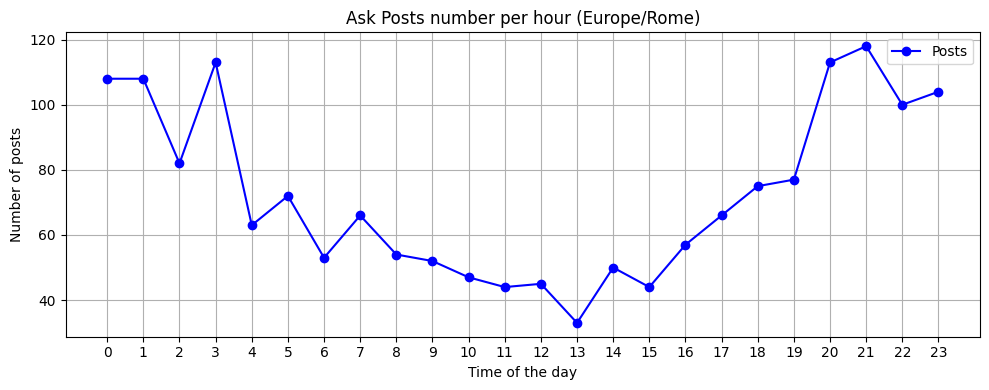

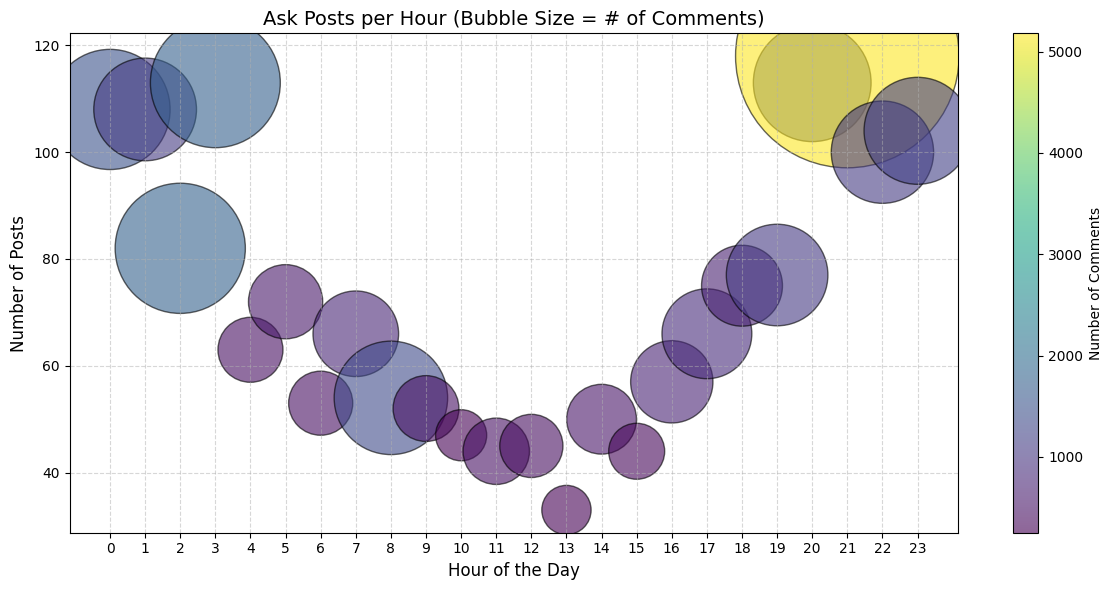

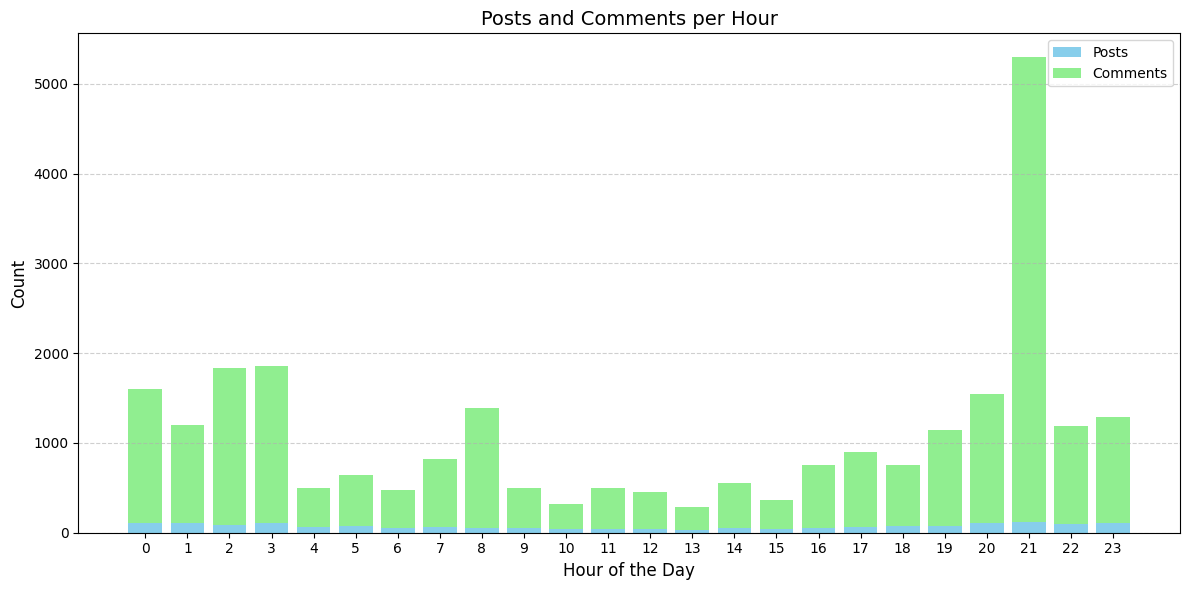

In [121]:
import matplotlib.pyplot as plt
from zoneinfo import ZoneInfo

result_list = list()

for post in ask_posts:
    result_list.append([post[6], post[4]])

counts_by_hour = dict()
comments_by_hour = dict()

source_tz = ZoneInfo('US/Eastern')  
target_tz = ZoneInfo('Europe/Rome')

for res in result_list:
    naive_dt = datetime.strptime(res[0], '%m/%d/%Y %H:%M')
    date_object = naive_dt.replace(tzinfo=source_tz)
    converted_dt = date_object.astimezone(target_tz)
    hour = converted_dt.hour

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = float(res[1])
    else: 
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += float(res[1])


counts_by_hour_sorted = dict(sorted(counts_by_hour.items(), key=lambda x: x[0]))
comments_by_hour_sorted = dict(sorted(comments_by_hour.items(), key=lambda x: x[0]))

print(counts_by_hour_sorted)

comments_by_hour_sorted_print = list()
for hour in comments_by_hour:
    comments_by_hour_sorted_print.append(f"{comments_by_hour[hour]:.2e}")

print(comments_by_hour_sorted_print)

'''Graphic rendering'''
hours = list(counts_by_hour_sorted.keys())
posts = list(counts_by_hour_sorted.values())
comments = list(comments_by_hour_sorted.values())

'''Posts per hour'''
plt.figure(figsize=(10, 4))
plt.plot(hours, posts, marker='o', color='blue', label='Posts')
plt.xticks(hours)  # mostra tutte le ore sull'asse X
plt.title('Ask Posts number per hour (Europe/Rome)')
plt.xlabel('Time of the day')
plt.ylabel('Number of posts')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

'''Comments per hour bubbles'''
plt.figure(figsize=(12, 6))
bubble_sizes = [c * 5 for c in comments]  # scale bubble size

plt.scatter(hours, posts, s=bubble_sizes, alpha=0.6, c=comments, cmap='viridis', edgecolors='black')
plt.xticks(hours)
plt.title('Ask Posts per Hour (Bubble Size = # of Comments)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.colorbar(label='Number of Comments')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

'''Stacked Bar Chart (posts + comments together)'''
import numpy as np

x = np.arange(len(hours))

plt.figure(figsize=(12, 6))
plt.bar(x, posts, label='Posts', color='skyblue')
plt.bar(x, comments, bottom=posts, label='Comments', color='lightgreen')

plt.xticks(x, hours)
plt.title('Posts and Comments per Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Average number of comments per posts created during each hour of the day

In [122]:
avg_by_hour = list()

for hour in counts_by_hour_sorted:
    avg_comments = int(comments_by_hour_sorted[hour]) / counts_by_hour_sorted[hour]
    avg_by_hour.append([hour, avg_comments])

for row in avg_by_hour:
    print('At ', row[0], ' people commented an average of ', row[1], ' times.')

At  0  people commented an average of  13.87037037037037  times.
At  1  people commented an average of  10.12962962962963  times.
At  2  people commented an average of  21.4390243902439  times.
At  3  people commented an average of  15.486725663716815  times.
At  4  people commented an average of  6.9523809523809526  times.
At  5  people commented an average of  7.930555555555555  times.
At  6  people commented an average of  8.037735849056604  times.
At  7  people commented an average of  11.515151515151516  times.
At  8  people commented an average of  24.72222222222222  times.
At  9  people commented an average of  8.634615384615385  times.
At  10  people commented an average of  5.76595744680851  times.
At  11  people commented an average of  10.386363636363637  times.
At  12  people commented an average of  9.2  times.
At  13  people commented an average of  7.636363636363637  times.
At  14  people commented an average of  10.1  times.
At  15  people commented an average of  7.386

Sorting values by hours with the highest average of commments

In [123]:
swap_avg_by_hour = list()

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

sorted_swap = sorted(swap_avg_by_hour, key=lambda x: x[0], reverse = True)
print(sorted_swap)

[[43.90677966101695, 21], [24.72222222222222, 8], [21.4390243902439, 2], [15.486725663716815, 3], [13.896103896103897, 19], [13.87037037037037, 0], [12.725663716814159, 20], [12.681818181818182, 17], [12.31578947368421, 16], [11.515151515151516, 7], [11.413461538461538, 23], [10.86, 22], [10.386363636363637, 11], [10.12962962962963, 1], [10.1, 14], [9.2, 12], [9.053333333333333, 18], [8.634615384615385, 9], [8.037735849056604, 6], [7.930555555555555, 5], [7.636363636363637, 13], [7.386363636363637, 15], [6.9523809523809526, 4], [5.76595744680851, 10]]


Top 5 Hours for Ask Posts Comments

In [124]:
big5 = list()

for i in range(5):
    time = datetime.strptime(str(sorted_swap[i][1]), '%H').strftime('%H:%M')
    avg = f"{sorted_swap[i][0]:.2f}"
    big5.append([time, avg])
for big in big5:
    print(big[0], big[1], ' average comments per post.')

21:00 43.91  average comments per post.
08:00 24.72  average comments per post.
02:00 21.44  average comments per post.
03:00 15.49  average comments per post.
19:00 13.90  average comments per post.


During which hours should you create a post to have a higher chance of receiving comments?

In [125]:
print('In descendant order, in order to receive a higher number of comments, the best time possible to post on Hacker News are: ')

for big in big5:
    print ('- ', big[0])

In descendant order, in order to receive a higher number of comments, the best time possible to post on Hacker News are: 
-  21:00
-  08:00
-  02:00
-  03:00
-  19:00
